<div class="alert alert-block alert-success">
<h1>Univariate Linear Regression</h1> 

- **Problem to solve:** How long do you have to study to get a specific score. We can try to see a pattern in that data and predict a score based on how many hours the subject studies.
- **Example:** You study 5.1 hours, and you get a 47% on the test, you study 9.2 hours, and you get an 88% score.

In [30]:
# Import the requierd libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
df = pd.read_csv('student_scores.csv')

In [25]:
# let's check the first 10 values

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


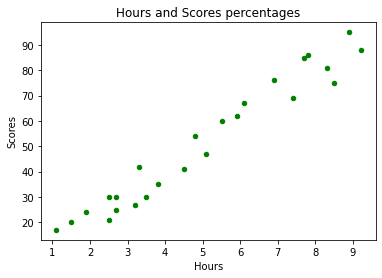

In [26]:
# Let's explore the relationship between the two variables
# We plot the hours on the X-axis and scores on the Y-axis, and for each pair, a marker will be positioned based on their values:

df.plot.scatter(x = 'Hours', y = 'Scores', title= 'Hours and Scores percentages',  color='green');

<div class="alert alert-block alert-info">

**Observation:**
There's a reasonably high positive correlation. The shape of the line appears to be straight; we can say there is a positive linear correlation between the Hours and Scores variables.


In [5]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<div class="alert alert-block alert-info">

**Observation:**
Having a high linear correlation means that we can generally tell the future value; even without calculation, you can conclude that if someone studies for a certain amount of time, they will get a certain percentage as their score. Since this relationship is solid, we'll be able to build a simple yet accurate linear regression algorithm to predict the score based on the study time.

## Linear Regression with Scikit-learn

In [6]:
# Let's separate the target (y) and feature (X)

y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [7]:
# Let's split the dataset 80% train, 20% test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [8]:
# Training a Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [9]:
# We need to fit the line to our data.

regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Let's check what is the regressor intercept
# This represents the mean value of the response variable when all of the predictor variables in the model are equal to zero

print(regressor.intercept_)

[2.13003098]


In [11]:
# The parameter β (the regression coefficient) signifies the amount by which change in x must be multiplied to
# give the corresponding average change in y, or the amount y changes for a unit increase in x.

print(regressor.coef_)

[[9.84383236]]


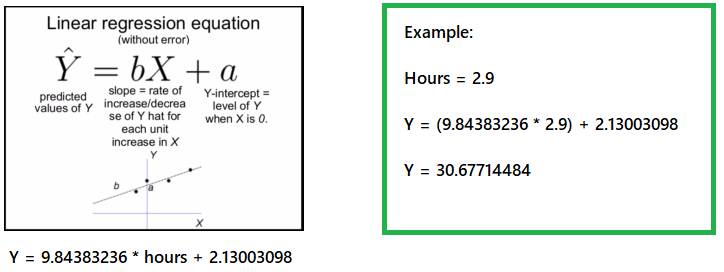

## Making Predictions

In [12]:
# Method 1, creating a formula, passing the 2.9 hrs value directly

score = ((regressor.coef_ * 2.9) + regressor.intercept_)
print(score)

[[30.67714484]]


In [13]:
# Method 2, Predict new values using othe predict() method passing 2.9 in double brackets to have a 2 dimensional array:

score = regressor.predict([[2.9]])
print(score)

[[30.67714484]]


In [14]:
# Instead of typing directly the value, we can ask for hours

score_ask = float(input('How many hours did you study? (From 0 to 10) '))
score = regressor.predict([[score_ask]])
print('Studying {} hours, you have a high chance of gettting a {}% score.'.format(score_ask, score)) 

How many hours did you study? (From 0 to 10) 2.9
Studying 2.9 hours, you have a high chance of gettting a [[30.67714484]]% score.


In [15]:
# To make predictions on the test data, we pass the X_test values to the predict() method.

y_pred = regressor.predict(X_test)

In [16]:
### The y_pred variable contains all the predicted values for the input values in the X_test.
# We can compare the actual output values for X_test with the predicted values, 
# by arranging them side by side in a dataframe structure:

df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      47  52.333576
1      20  16.895780
2      62  60.208642
3      42  34.614678
4      27  33.630295


<div class="alert alert-block alert-info">

**Observation:**
The expected model is not precise since we have a minimal dataset. However, the predicted percentages are close to the actual ones. 

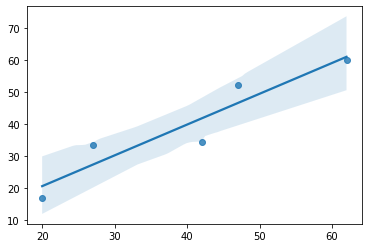

In [32]:
sns.regplot(y_test,predictions);

<div class="alert alert-block alert-info">

**Observation:**
The above graph shows the model is predicting results within acceptable range. 

## Model Evaluation
- For regression models, three evaluation metrics are mainly used:
     - Mean Absolute Error (MAE)
     - Mean Squared Error (MSE)
     - Root Mean Squared Error (RMSE)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Metrics calculations

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [19]:
# print the metrics results using the f string and the 2 digit precision after the comma with :.2f:

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4.85
Mean squared error: 27.96
Root mean squared error: 5.29


<div class="alert alert-block alert-info">

**Observation:**
All the errors are low, and the metrics show a small value range despite the small data.